<a href="https://colab.research.google.com/github/yporquenoahora/EDA/blob/master/src/notebooks/datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Viz Playgorund - around the world</h1>

WTF is indie music?
Now?
In the 50's?
What was indie music in the 50's and what is 50's indie music nowadays?

In [2]:
%pip install plotly
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("../data/songs.csv")#.iloc[:,1:]
df.columns

Index(['id', 'names', 'artists', 'release_date', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'genre'],
      dtype='object')

In [5]:
df["release_date"].unique()

array(['2008-01-01', '2013-10-04', '2005-06-21', '1951', '1991-01-20',
       '1996-01-01', '1999-09-28', '1949', '2003-01-01', '2002-07-11',
       '1991-01-01', '1991-09-03', '2003', '2009-01-01', '1987-10-26',
       '2015-07-22', '2013-07-24', '2005-01-01', '2010-02-05',
       '2005-04-26', '2007-05-26', '1995-01-01', '1960-05-01', '1958',
       '2012-01-23', '1989-08-08', '2013-03-19', '1994-01-01', '0000',
       '1948', '2010-04-20', '2010-05-28', '2005', '1989-06-13',
       '2004-01-01', '2001-01-01', '2013-03-31', '1964-01-01',
       '2002-09-24', '1997-01-01', '2011-01-19', '1957-01-01',
       '1992-09-29', '1964', '2007', '1973-01-01', '2015-01-14',
       '1993-01-01', '2013-04-19', '2006-01-01', '2015-04-16',
       '1964-08-01', '2014-10-20', '1999-07-27', '2013-02-06',
       '1994-04-19', '2012-01-01', '1956', '2004-11-23', '2002-01-01',
       '2000-10-03', '1996-01-30', '1959', '1997-02-14', '1962-06-01',
       '2013-09-01', '2011-09-16'], dtype=object)

In [31]:
dfSortByReleaseDate = df.sort_values(by="release_date")

In [10]:
%pip install nbformat==5.1.2

  Using cached nbformat-5.1.2-py3-none-any.whl (113 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.7.3
    Uninstalling nbformat-5.7.3:
      Successfully uninstalled nbformat-5.7.3
  Rolling back uninstall of nbformat
  Moving to c:\python39\lib\site-packages\nbformat-5.7.3.dist-info\
   from C:\Python39\Lib\site-packages\~bformat-5.7.3.dist-info
  Moving to c:\python39\lib\site-packages\nbformat\
   from C:\Python39\Lib\site-packages\~bformat
Note: you may need to restart the kernel to use updated packages.


Reason for being yanked: Name generation process created inappropriate id values
ERROR: Could not install packages due to an OSError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'c:\\Python39\\Scripts\\jupyter-trust.exe' -> 'c:\\Python39\\Scripts\\jupyter-trust.exe.deleteme'



In [32]:
#dfSortByReleaseDate.rename(columns={"ranking":"id"}, inplace=True)
dfSortByReleaseDate.set_index("id")
dfSortByReleaseDate.head()

,id,names,artists,release_date,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,genre
37,2dX2phLETbjqZA0D78ms4T,Secret Love,Doris Day,1948,0.280,0.151,11,-14.317,1,0.0355,...,0.1340,0.176,76.222,audio_features,spotify:track:2dX2phLETbjqZA0D78ms4T,https://api.spotify.com/v1/tracks/2dX2phLETbjq...,https://api.spotify.com/v1/audio-analysis/2dX2...,218253,4,"['adult standards', 'easy listening', 'lounge'..."
8,4mSKeFHnAjwZIG4wQDCe2Z,"The Loveliest Night of the Year (From ""The Gre...",Irving Aaronson,1949,0.183,0.246,1,-13.514,1,0.0342,...,0.3600,0.205,85.132,audio_features,spotify:track:4mSKeFHnAjwZIG4wQDCe2Z,https://api.spotify.com/v1/tracks/4mSKeFHnAjwZ...,https://api.spotify.com/v1/audio-analysis/4mSK...,213467,4,[]
15,70ZRroKKjOBvGkBlHoDDp0,Half As Much,Rosemary Clooney,1951,0.271,0.187,10,-12.016,1,0.0319,...,0.2540,0.253,106.583,audio_features,spotify:track:70ZRroKKjOBvGkBlHoDDp0,https://api.spotify.com/v1/tracks/70ZRroKKjOBv...,https://api.spotify.com/v1/audio-analysis/70ZR...,166400,3,"['adult standards', 'easy listening', 'lounge'..."
3,2scbGWVjIYsfieovyRyfv1,Come On-A My House,Rosemary Clooney,1951,0.531,0.676,10,-7.168,0,0.1250,...,0.4000,0.957,183.208,audio_features,spotify:track:2scbGWVjIYsfieovyRyfv1,https://api.spotify.com/v1/tracks/2scbGWVjIYsf...,https://api.spotify.com/v1/audio-analysis/2scb...,117267,4,"['adult standards', 'easy listening', 'lounge'..."
79,1XRA4Tjb2YrcQU5ThDllCw,The Battle Of New Orleans,Johnny Horton,1956,0.703,0.753,9,-11.783,1,0.1350,...,0.0997,0.921,177.162,audio_features,spotify:track:1XRA4Tjb2YrcQU5ThDllCw,https://api.spotify.com/v1/tracks/1XRA4Tjb2Yrc...,https://api.spotify.com/v1/audio-analysis/1XRA...,152067,4,['cowboy western']


In [42]:
dfSortByReleaseDate[dfSortByReleaseDate.release_date > "1980"]

0

In [43]:
dfSortByReleaseDate["key_dism"] = dfSortByReleaseDate["key"] / 10

In [358]:
# prepare data frame
#df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = dfSortByReleaseDate['release_date'],
                    y = dfSortByReleaseDate['energy'],
                    name = 'energy',
                    mode= 'lines',
                    marker = dict(color = 'rgba(160, 112, 2, 0.8)'),
                    text = dfSortByReleaseDate['energy'])

trace2 = go.Scatter(
                    x = dfSortByReleaseDate['release_date'],
                    y = dfSortByReleaseDate['key_dism'],
                    name = 'key',
                    mode= 'lines',
                    marker = dict(color = 'rgba(26, 12, 2, 0.8)'),
                    text = dfSortByReleaseDate['key_dism'])

data = [trace1, trace2]

layout = dict(title = 'Evolucion de la energia - escala',
             xaxis= dict(title= '',ticklen=5, ticks="outside", tickson="boundaries",), 
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)






In [48]:
# import graph objects as "go"
import plotly.graph_objs as go

trace10 = go.Scatter(x=dfSortByReleaseDate["release_date"], y=dfSortByReleaseDate["loudness"], name="loudness", mode="markers")
# Creating trace1

data = [trace1,trace10]

layout = dict(title = 'Evolucion de la loudness',
             xaxis= dict(title= '',ticklen=.05, ticks="outside", tickson="boundaries"), 
           )

fig = go.Figure(data = trace10, layout=layout)

fig.update_yaxes(title_text="loudness")

fig.show()






In [88]:
%pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

A few song to overview features

In [272]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
client_id = 'your client_id'
client_secret = 'your client_secret'
# create a credential manager and api layer
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [273]:
#unas cuantas canciones para orientarnos
track_ids = ["5mc6EyF1OIEOhAkD0Gg9Lc", "4kLLWz7srcuLKA7Et40PQR", "5yyRH93h4Pm6tXXYTxt7ea", "09jizuUWVKPeivRtjcZuOr", "28baA91bOjAcIlIF2il0aH"]
aFeatures = []
for id in track_ids:
    
    
    song = sp.track(id)

    artist_uri = song["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Name, popularity, genre
    #artist_name = song["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]

    features = sp.audio_features(id)    
    sp.predict_song_mood(song=song)
    
    features[0].update({"name": song.get("name"), "genres":artist_genres})    
    aFeatures.append(features[0])

print(pd.DataFrame(aFeatures).columns)


df = pd.DataFrame(aFeatures)
df.drop([ 'type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)
#res = pd.concat([df,col_name], axis=1)
df

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'name', 'genres'],
      dtype='object')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name,genres
0,0.546,0.7240,10,-8.639,0,0.0427,0.000273,0.667000,0.1330,0.5860,89.991,373307,4,Closer,"[alternative metal, alternative rock, cyberpun..."
1,0.743,0.7660,0,-6.375,1,0.0265,0.087300,0.000000,0.5090,0.6100,127.960,289133,4,I Gotta Feeling,"[dance pop, pop, pop rap]"
2,0.342,0.2000,4,-13.569,1,0.0324,0.134000,0.000153,0.3410,0.0743,133.113,286653,4,The Blower's Daughter,"[irish rock, irish singer-songwriter, neo mell..."
3,0.117,0.0216,2,-33.060,0,0.0388,0.949000,0.930000,0.2310,0.0422,168.080,260067,3,Stolen Memories,"[orchestral soundtrack, soundtrack]"
4,0.619,0.7150,10,-4.939,1,0.0418,0.076100,0.000000,0.0801,0.9540,90.645,135573,3,Hacia Belen va Una Burra,[]


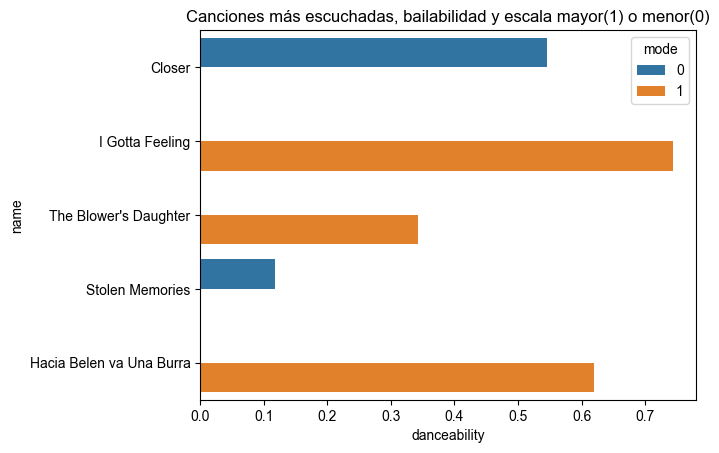

In [359]:
b = sns.barplot(data=df.head(30), x="danceability", y="name", hue="mode",orient="h",saturation=0.75, width=0.8)
sns.set(rc={"figure.figsize":(8, 18)}) #width=8, height=4
b.set_title("Canciones más escuchadas, bailabilidad y escala mayor(1) o menor(0)")

b.tick_params(labelsize=10)

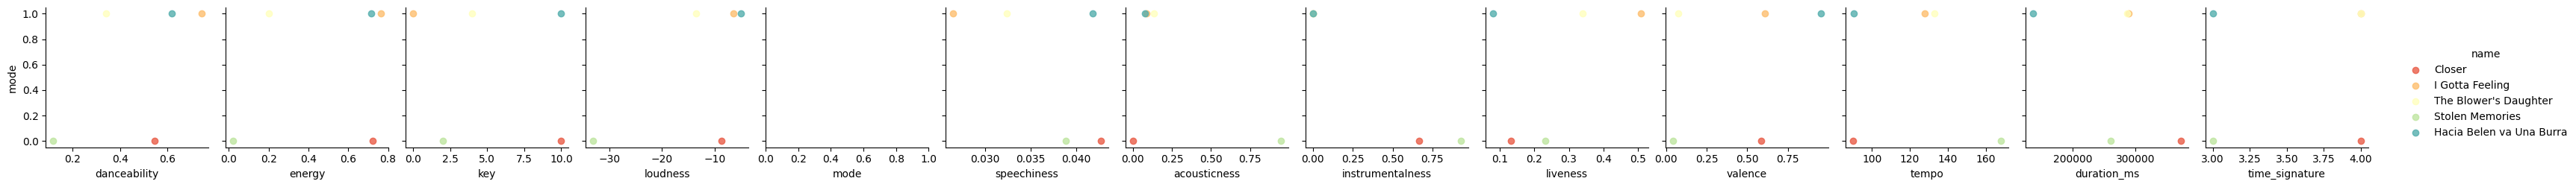

In [277]:
sns.pairplot(df,  
             hue="name",
             y_vars=["mode"],
             #x_vars=["danceability"],
             palette="Spectral", 
             kind="reg");
             #dropna=True );

In [287]:
len(df)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name,genres
0,0.546,0.7240,10,-8.639,0,0.0427,0.000273,0.667000,0.1330,0.5860,89.991,373307,4,Closer,"[alternative metal, alternative rock, cyberpun..."
1,0.743,0.7660,0,-6.375,1,0.0265,0.087300,0.000000,0.5090,0.6100,127.960,289133,4,I Gotta Feeling,"[dance pop, pop, pop rap]"
2,0.342,0.2000,4,-13.569,1,0.0324,0.134000,0.000153,0.3410,0.0743,133.113,286653,4,The Blower's Daughter,"[irish rock, irish singer-songwriter, neo mell..."
3,0.117,0.0216,2,-33.060,0,0.0388,0.949000,0.930000,0.2310,0.0422,168.080,260067,3,Stolen Memories,"[orchestral soundtrack, soundtrack]"
4,0.619,0.7150,10,-4.939,1,0.0418,0.076100,0.000000,0.0801,0.9540,90.645,135573,3,Hacia Belen va Una Burra,[]


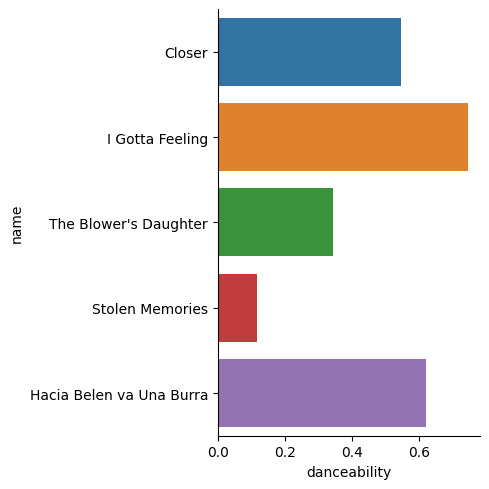

In [351]:
#sns.catplot(data=df, x="danceability", y="name", kind="bar", hue="mode", palette="Spectral" );
sns.catplot(data = df, orient="h", kind="bar",x="danceability", y="name",  height= 5, aspect= 1)
             

In [309]:
from matplotlib.dates import DateFormatter

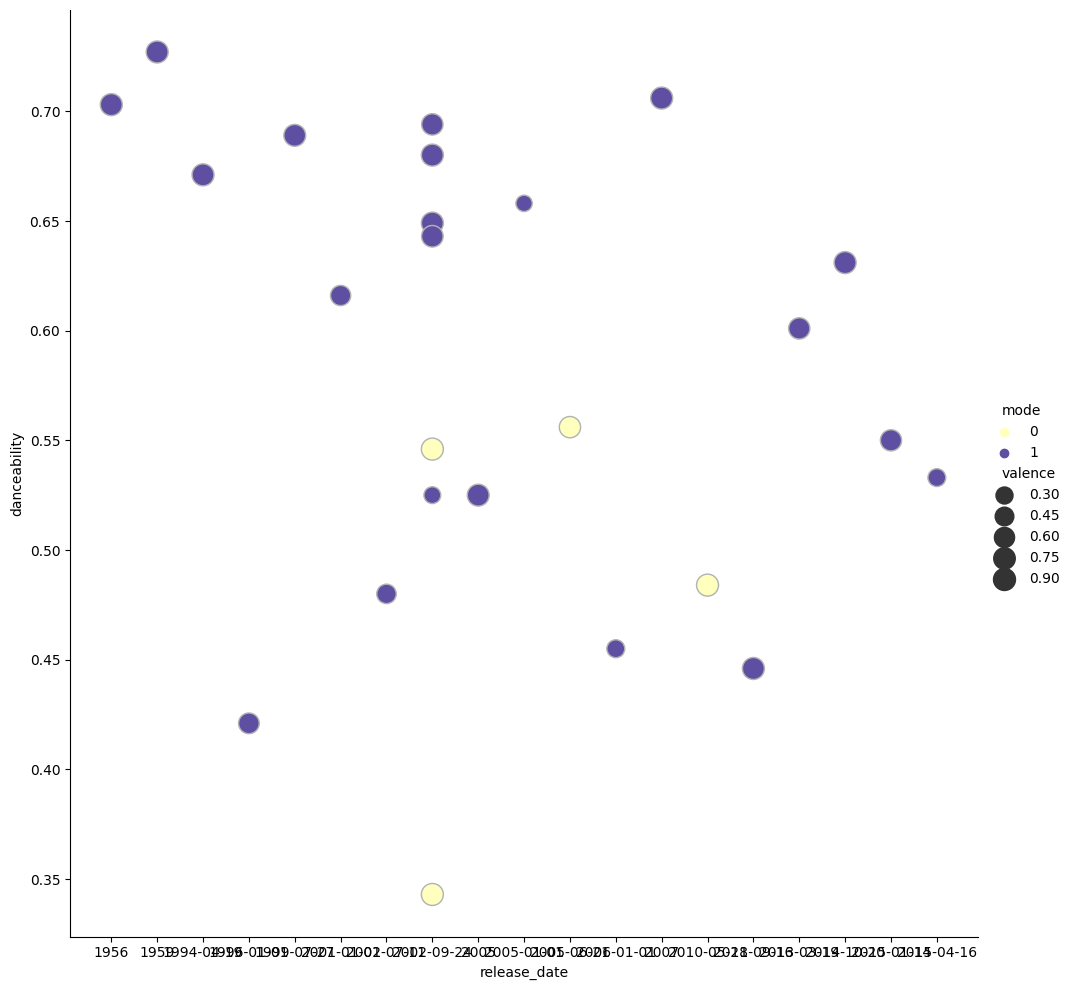

In [316]:
g = sns.relplot(
    data=data,    
    x="release_date", y="danceability", hue="mode", size="valence",
    palette="Spectral", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
date_form = DateFormatter("%m-%d")
#TODO
#format axis


In [55]:
dfSortByReleaseDate.columns

Index(['id', 'names', 'artists', 'release_date', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'genre',
       'key_dism'],
      dtype='object')

In [317]:
dfSortByReleaseDate.dropna(inplace=True)
dataFull = dfSortByReleaseDate[~dfSortByReleaseDate["genre"].str.contains("adult standards", "easy listening")]

dataFull = data[data["genre"].str.len() > 2]

dataFull.columns


Index(['id', 'names', 'artists', 'release_date', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'genre',
       'key_dism'],
      dtype='object')

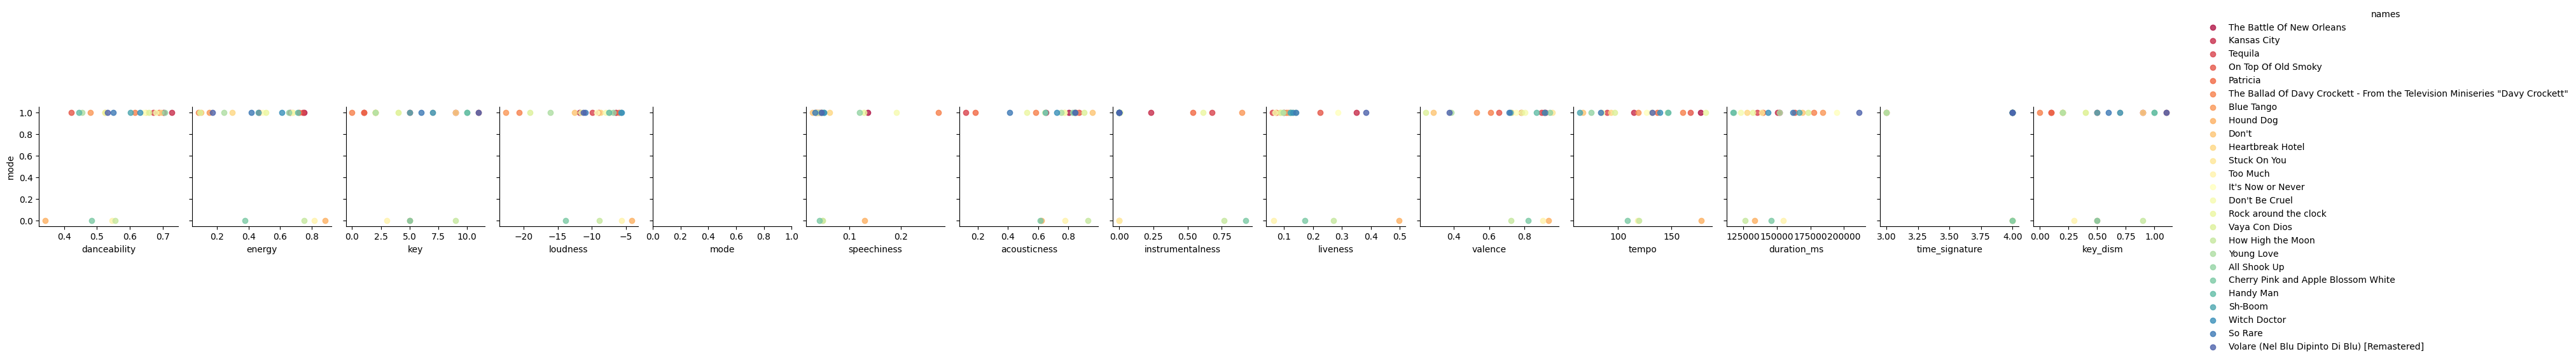

In [319]:
dataFull = dataFull[data["genre"].str.len() > 2]
sns.pairplot(dataFull,  
             hue="names",
             y_vars=["mode"],
             #x_vars=["danceability"],
             palette="Spectral", 
             kind="reg");
             #dropna=True );

Muy pocas tienen predominio de acordes menores

Ahora vamos a ver qué géneros han triunfado más


In [341]:
#order by genre

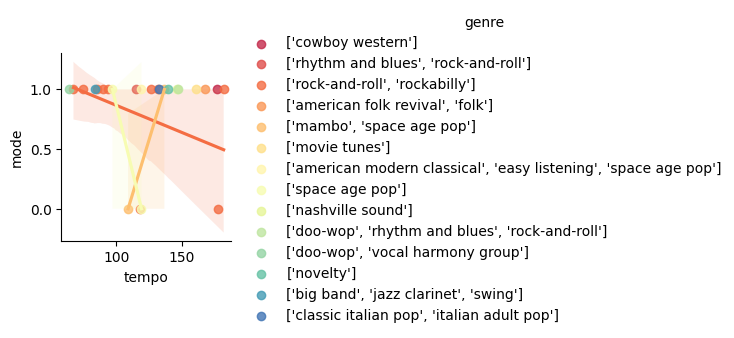

In [321]:
#data = data[["genre", "key",  "tempo", "valence", 'danceability', 'energy','key', 'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness']]
sns.pairplot(dataFull,  
             hue="genre",
             y_vars=["mode"],
             x_vars=["tempo"],
             palette="Spectral", 
             kind="reg", 
             dropna=True );

In [340]:
dataFull.size

575

c:\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



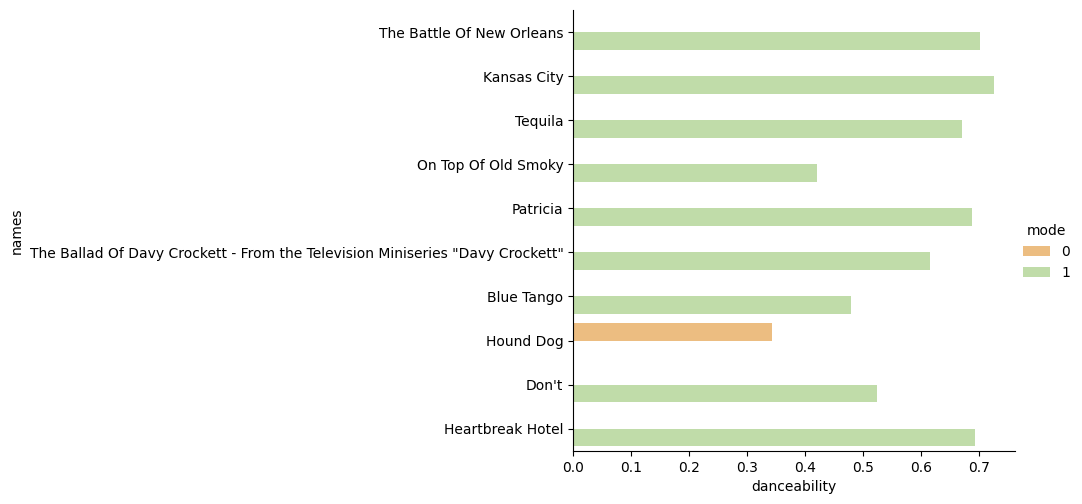

In [331]:
sns.catplot(data=dataFull.head(10), x="danceability", y="names", kind="bar", hue="mode", palette="Spectral" );

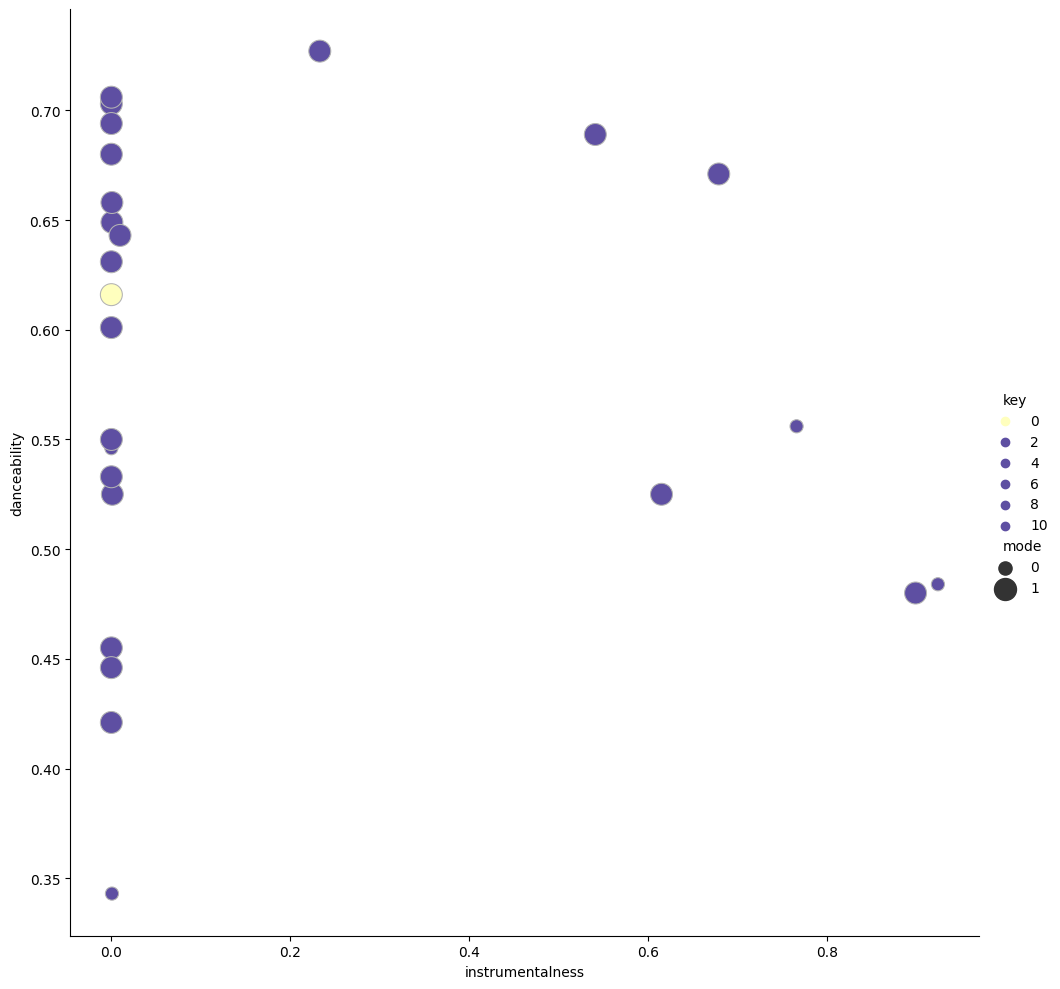

In [339]:
g = sns.relplot(
    data=dataFull,    
    x="instrumentalness", y="danceability", hue="key", size="mode",
    palette="Spectral", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
date_form = DateFormatter("%m-%d")

#TODO
#tooltips
#format axis


In [354]:
dfGenres = pd.read_csv("../data/songs_genres.csv").iloc[:,1:]
dfGenres

,adult standards,easy listening,lounge,vocal jazz,space age pop,swing,torch song,american folk revival,folk,american modern classical,...,nashville sound,classic italian pop,italian adult pop,bubblegum pop,sunshine pop,novelty,soul,louisiana blues,memphis blues,new orleans blues
0,99,90,95,85,75,85,59,5,5,10,...,91,70,70,99,92,73,85,82,82,82


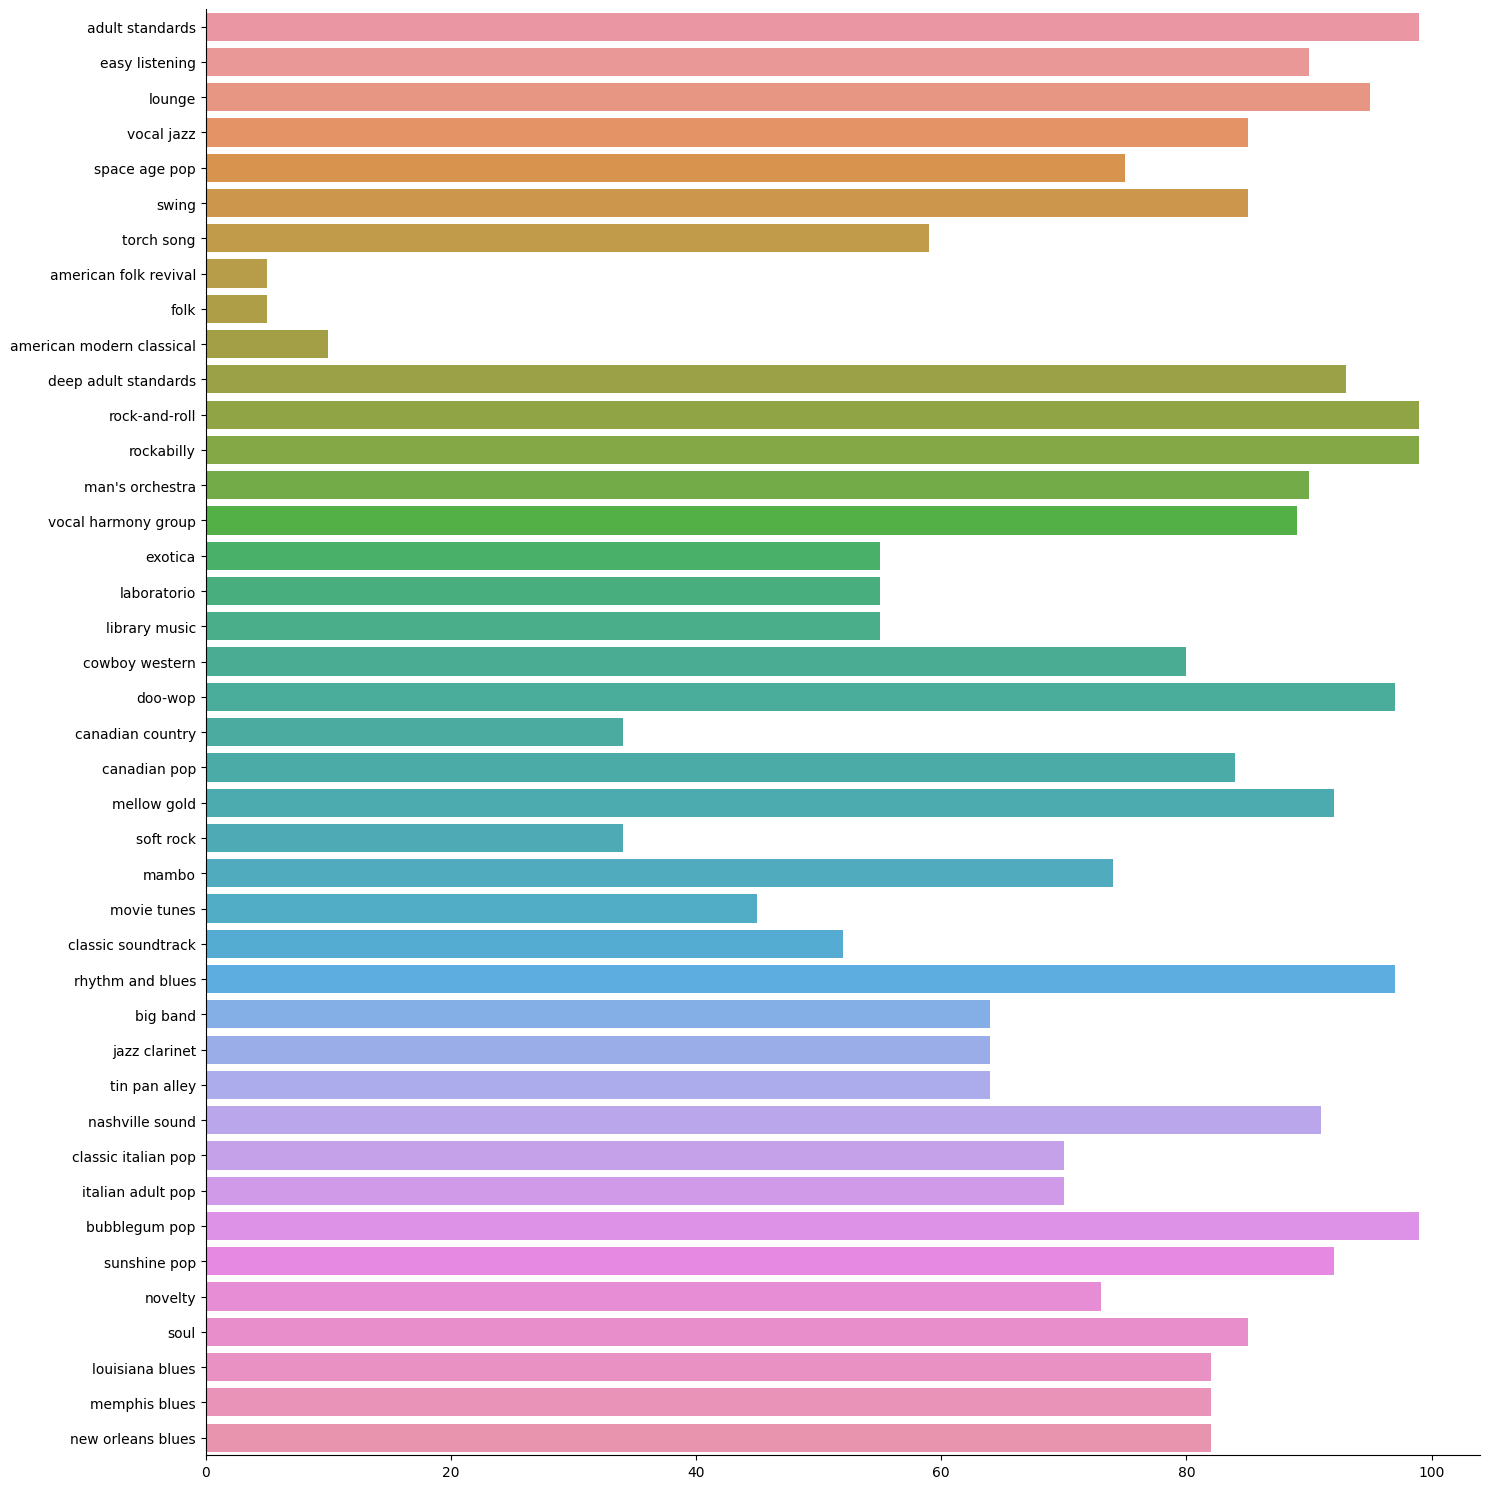

In [357]:
sns.catplot(data = dfGenres, orient="h", kind="bar",height= 15, aspect= 1)